In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/video-games/games.csv')
df.head()

,id,name,released,added,playtime,reviews_count,ratings_count,rating
0,3498,Grand Theft Auto V,2013-09-17,19385,73,6421,6332,4.47
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567,46,6122,6029,4.66
2,4200,Portal 2,2011-04-18,17494,11,5310,5263,4.62
3,5286,Tomb Raider (2013),2013-03-05,15290,10,3686,3660,4.05
4,4291,Counter-Strike: Global Offensive,2012-08-21,15174,65,3267,3236,3.57


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20580 entries, 0 to 20579
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20580 non-null  int64  
 1   name           20580 non-null  object 
 2   released       19894 non-null  object 
 3   added          20580 non-null  int64  
 4   playtime       20580 non-null  int64  
 5   reviews_count  20580 non-null  int64  
 6   ratings_count  20580 non-null  int64  
 7   rating         20580 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.3+ MB


In [4]:
df.describe()

,id,added,playtime,reviews_count,ratings_count,rating
count,20580.000000,20580.000000,20580.000000,20580.000000,20580.000000,20580.000000
mean,99829.712974,681.082313,3.394704,106.611370,105.464431,2.209226
std,181760.561898,1509.210518,11.109085,338.262309,334.656611,1.673076
min,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000
25%,13411.750000,84.000000,1.000000,4.000000,4.000000,0.000000
50%,21393.500000,161.000000,2.000000,13.000000,13.000000,2.820000
75%,54124.000000,496.000000,4.000000,49.000000,48.000000,3.670000
max,960912.000000,19385.000000,900.000000,6421.000000,6332.000000,4.800000


<Axes: >

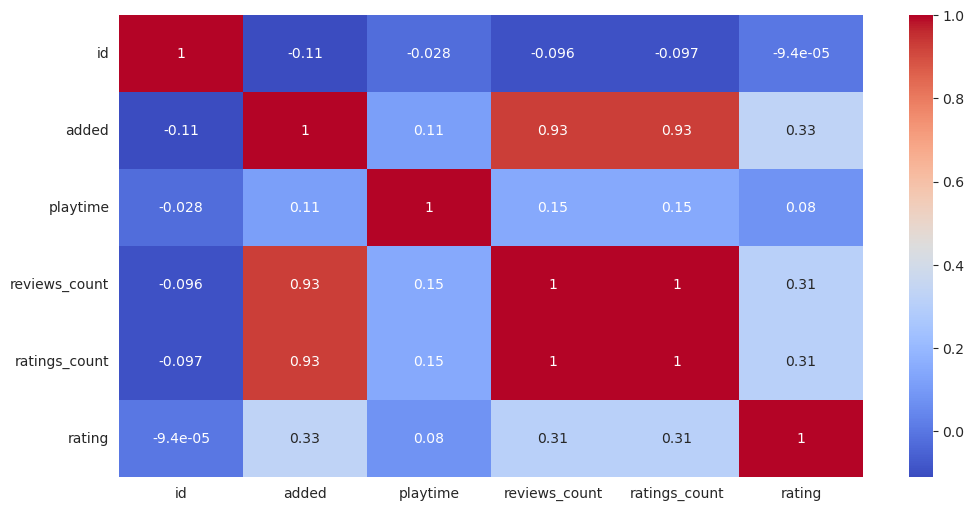

In [5]:
#make a heatmap with data correlations
sns.set_style('darkgrid')
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

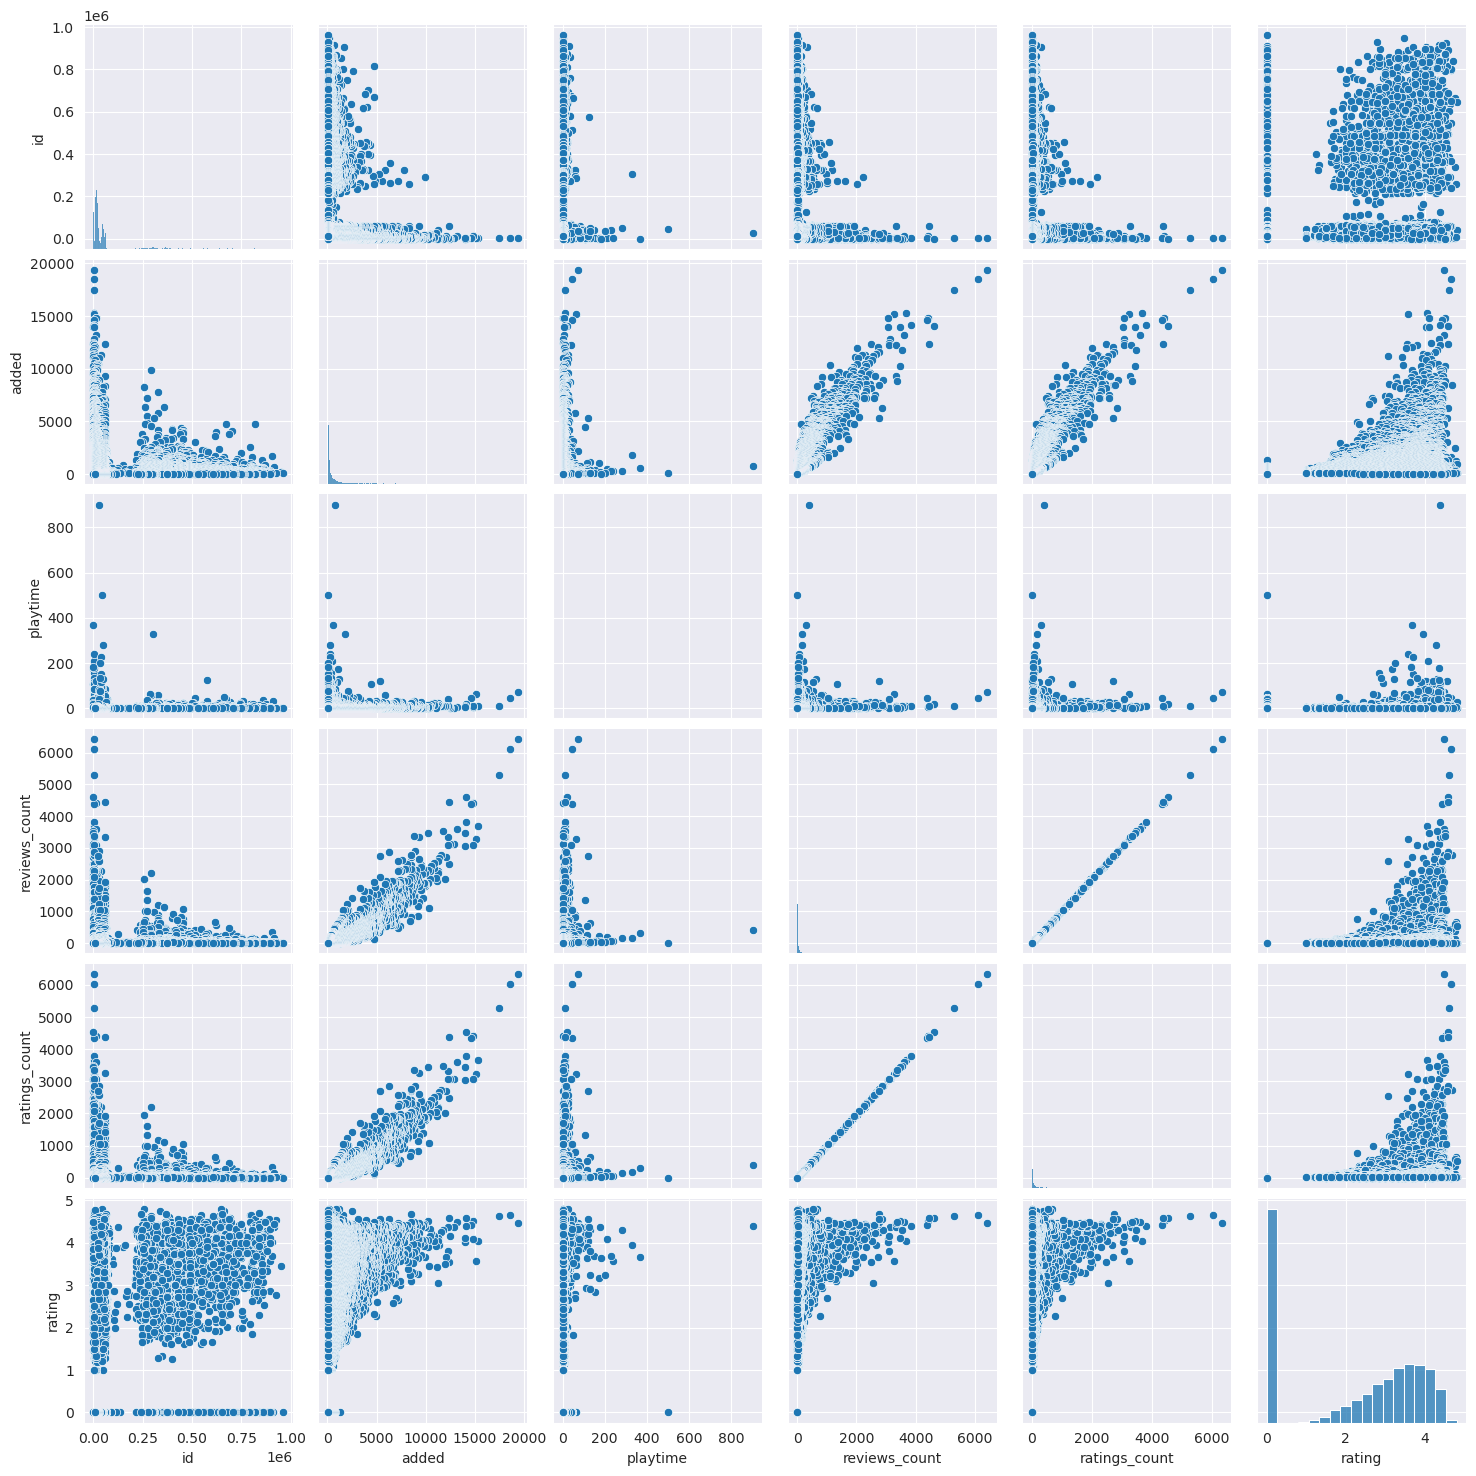

In [6]:
#pairplot for overview
sns.pairplot(df)

In [7]:
# Data Preprocessing
# Remove duplicates and nulls
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Feature Engineering

In [8]:
# Change release day to date time
df['released']= pd.to_datetime(df['released'])

In [9]:
# Set year
df['releasedYear']=df['released'].dt.year

In [10]:
# Set months
df['releasedMonth']=df['released'].dt.month_name()
months = pd.get_dummies(df['releasedMonth'])
df = pd.concat([df,months],axis=1)
df.head()

,id,name,released,added,playtime,reviews_count,ratings_count,rating,releasedYear,releasedMonth,...,December,February,January,July,June,March,May,November,October,September
0,3498,Grand Theft Auto V,2013-09-17,19385,73,6421,6332,4.47,2013,September,...,0,0,0,0,0,0,0,0,0,1
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567,46,6122,6029,4.66,2015,May,...,0,0,0,0,0,0,1,0,0,0
2,4200,Portal 2,2011-04-18,17494,11,5310,5263,4.62,2011,April,...,0,0,0,0,0,0,0,0,0,0
3,5286,Tomb Raider (2013),2013-03-05,15290,10,3686,3660,4.05,2013,March,...,0,0,0,0,0,1,0,0,0,0
4,4291,Counter-Strike: Global Offensive,2012-08-21,15174,65,3267,3236,3.57,2012,August,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Set days
df['releasedDay']=df['released'].dt.day_name()
days = pd.get_dummies(df['releasedDay'])
df = pd.concat([df,days],axis=1)
df.head()

,id,name,released,added,playtime,reviews_count,ratings_count,rating,releasedYear,releasedMonth,...,October,September,releasedDay,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3498,Grand Theft Auto V,2013-09-17,19385,73,6421,6332,4.47,2013,September,...,0,1,Tuesday,0,0,0,0,0,1,0
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567,46,6122,6029,4.66,2015,May,...,0,0,Monday,0,1,0,0,0,0,0
2,4200,Portal 2,2011-04-18,17494,11,5310,5263,4.62,2011,April,...,0,0,Monday,0,1,0,0,0,0,0
3,5286,Tomb Raider (2013),2013-03-05,15290,10,3686,3660,4.05,2013,March,...,0,0,Tuesday,0,0,0,0,0,1,0
4,4291,Counter-Strike: Global Offensive,2012-08-21,15174,65,3267,3236,3.57,2012,August,...,0,0,Tuesday,0,0,0,0,0,1,0


In [12]:
# Drop unnecessary columns: name, id, released, releasedDay, releasedMonth, year
df.drop(['releasedMonth','releasedDay','released','id','name'],axis=1,inplace=True)

In [13]:
df.head()

,added,playtime,reviews_count,ratings_count,rating,releasedYear,April,August,December,February,...,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,19385,73,6421,6332,4.47,2013,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,18567,46,6122,6029,4.66,2015,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,17494,11,5310,5263,4.62,2011,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,15290,10,3686,3660,4.05,2013,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,15174,65,3267,3236,3.57,2012,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
# Make function that turns rating into 0 to 10 stars 
def turnToStarRating(rating):
    if rating>=4.75:
        return 10
    elif rating >= 4.5:
        return 9.5
    elif rating>= 4.25:
        return 9
    elif rating >=4:
        return 8.5
    elif rating >= 3.75:
        return 8
    elif rating>= 3.5:
        return 7.5
    elif rating >=3.25:
        return 7
    elif rating>= 3:
        return 6.5
    elif rating >=2.75:
        return 6
    elif rating >= 2.5:
        return 5.5
    elif rating>= 2.25:
        return 5
    elif rating >=2:
        return 4.5
    elif rating >=1.75:
        return 4
    elif rating>= 1.5:
        return 3.5
    elif rating >=1.25:
        return 3
    elif rating >= 1:
        return 2.5
    elif rating>= 0.75:
        return 2
    elif rating >=0.5:
        return 1.5
    elif rating >= 0.25:
        return 1
    elif rating > 0:
        return 0.5
    else:
        return 0

In [15]:
# Make starRating column and remove rating
df['starRating']=df['rating'].apply(turnToStarRating)
df.drop('rating',axis=1,inplace=True)

In [16]:
df.head()

,added,playtime,reviews_count,ratings_count,releasedYear,April,August,December,February,January,...,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,starRating
0,19385,73,6421,6332,2013,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,9.0
1,18567,46,6122,6029,2015,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,9.5
2,17494,11,5310,5263,2011,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,9.5
3,15290,10,3686,3660,2013,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8.5
4,15174,65,3267,3236,2012,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,7.5


# Model Creation

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Split training and testing data
X = df.drop('starRating',axis=1)
y=df['starRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)


In [18]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression().fit(X_train,y_train)

# Make predictions
lrPreds= lrModel.predict(X_test)

# Evaluating
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error (MSE)\t:", mean_absolute_error(y_test, lrPreds))
print("Mean Squared Error (MSE)\t:", mean_squared_error(y_test, lrPreds))
print('Root Mean Squared Error (RMSE)\t:', np.sqrt(mean_squared_error(y_test, lrPreds)))
print('R-squred (r2) score\t\t:', r2_score(y_test,lrPreds))




Mean Absolute Error (MSE)	: 2.6846479228777875
Mean Squared Error (MSE)	: 9.381485412623482
Root Mean Squared Error (RMSE)	: 3.0629210588298683
R-squred (r2) score		: 0.20587241306830273


* MAE of 2.68 suggests that predicted 'starRating' value deviate from actual values by about 2.68 units 
* MSE of 9.38 suggests that predicted 'starRating' value deviate from actual values by about 9.38 squared units
* RMSE of 3.06 suggests that predicted 'starRating' value deviated from actual value by about 3.06 units
* R2 score of 0.21 suggests that there is a weak fit between the prediction of the model and the actual result  as only 21% of variance is explained by the model

In [19]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor().fit(X_train,y_train)

# Make predictions
rfPreds= rfModel.predict(X_test)

# Evaluating
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error (MSE)\t:", mean_absolute_error(y_test, rfPreds))
print("Mean Squared Error (MSE)\t:", mean_squared_error(y_test, rfPreds))
print('Root Mean Squared Error (RMSE)\t:', np.sqrt(mean_squared_error(y_test, rfPreds)))
print('R-squred (r2) score\t\t:', r2_score(y_test,rfPreds))


Mean Absolute Error (MSE)	: 0.5781997176027612
Mean Squared Error (MSE)	: 0.8105056440225918
Root Mean Squared Error (RMSE)	: 0.9002808695193916
R-squred (r2) score		: 0.9313920063856721


* MAE of 0.58 suggests that predicted 'starRating' value deviate from actual values by about 0.58 units 
* MSE of 0.81 suggests that predicted 'starRating' value deviate from actual values by about 0.81 squared units
* RMSE of 0.90 suggests that predicted 'starRating' value deviated from actual value by about 0.90 units
* R2 score of 0.93 suggests that there is a strong fit between the prediction of the model and the actual result  as 93% of variance is explained by the model

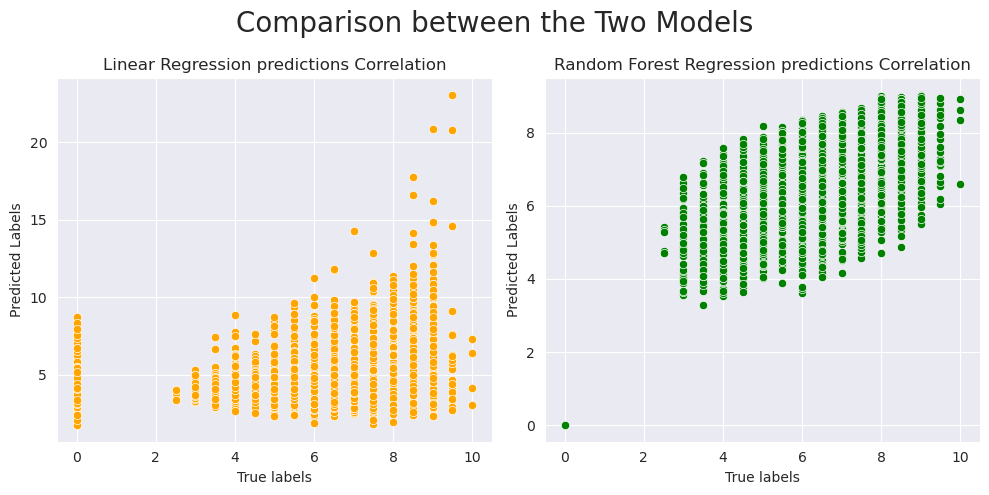

In [20]:
#comparing two models
fig = plt.figure(figsize=(10,5))
fig.suptitle("Comparison between the Two Models", fontsize=20)

plt.subplot(1,2,1)
sns.scatterplot(x=y_test,y=lrPreds,c='orange')
plt.title('Linear Regression predictions Correlation')
plt.xlabel('True labels')
plt.ylabel('Predicted Labels')


plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=rfPreds,c='green')
plt.title('Random Forest Regression predictions Correlation')
plt.xlabel('True labels')
plt.ylabel('Predicted Labels')

plt.tight_layout()

# Conclusion
2 regression models were created: Linear Regression Model and Random Forest Regression Model.

The Random Forest Regression model had R2-score of 0.93 which is 0.71 higher than Linear Regression model's R2-score of 0.21. This shows that the RF regression model is able to produce predictions that are closer to the true results 71% better than the LR model.

Comparing the two models, the Random Forest Regression model performed much better than the Linear regression model on all evaluation metrics: MAE, MSE, RMSE and R2-score. 

**Therefore, the Random Forest Regression Model was the best model for predicting a video game's star rating with a 10 point scale.**